**지도학습?**  
학습을 위한 다양한 피처와 분류 결정값인 레이블(Label) 데이터로 모델을 학습한 뒤, 별도의 테스트 데이터 세트에서 미지의 레이블을 예측하는 것으로 명확한 정답이 주어진 데이터를 먼저 학습한 뒤 미지의 정답을 예측하는 방식  
  
`학습 데이터 세트` : 학습을 위해 주어진 데이터 세트  
`테스트 데이터 세트` : 머신러닝 모델의 예측 성능을 평가하기 위해 별도로 주어진 데이터 세트



## 1. 붓꽃 품종 예측하기

붓꽃 데이터 세트로 붓꽃의 품종을 분류해보자.  
분류(Classfication)은 대표적인 지도학습(Supervised Learning) 방법의 하나이다.  

In [1]:
# 사이킷런 자체적으로 제공하는 데이터 세트 생성
from sklearn.datasets import load_iris

# 트리 기반 머신러닝 알고리즘 구현한 클래스의 모임
from sklearn.tree import DecisionTreeClassifier

# 학습, 검증, 예측 데이터로 분리, 최적의 하이퍼 파라미터로 평가하기 위한 모듈의 모임
from sklearn.model_selection import train_test_split
# train_test_split -> 학습 데이터, 테스트 데이터 분리

In [2]:
import pandas as pd

# 데이터 셋 로딩
iris = load_iris()

# iris 데이터 셋에서 피쳐만으로 된 데이터를 ndarray 형식으로 가지고 있음
iris_data = iris.data

# iris 데이터 셋에서 레이블(결정값) 데이터를 ndarray 형식으로 가지고 있음
iris_label = iris.target

# DataFrame화
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
iris_df['label'] = iris.target #label 명시

In [3]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
# 피처, 레이블 데이터를 각각 학습 데이터, 테스트 데이터에 생성
X_train, X_test, y_train, y_test =  train_test_split(iris_data, iris_label,
                                                    test_size = 0.2, random_state=11)

In [5]:
# DecisionTreeClassifier 객체 생성 (의사결정트리)
dt_clf = DecisionTreeClassifier(random_state=11)

In [6]:
# fit() 메서드에 학습용 피처 데이터 속성과 레이블(결정값) 데이터 속성을 입력
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

`DecisinTreeClassifier 객체`는 **학습 데이터**를 기반으로 학습이 완료되었음.  
이제 `DecisionTreeClassifier 객체`를 활용해 **테스트 데이터**를 이용하여 예측을 진행

In [7]:
# predict() 메서드를 이용하여 피처 테스트 데이터를 입력하여 예측값 반환
pred = dt_clf.predict(X_test)
pred

array([2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1])

In [8]:
# accuracy_socre() -> (실제 레이블 데이터 셋, 예측 레이블 데이터 셋)
from sklearn.metrics import accuracy_score
print('예측 정확도 : {0:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도 : 0.9333


붓꽃 데이터 셋 분류를 예측한 프로세스 과정  
**1. 데이터 셋 분리** : train_test_split(학습용 피처, 레이블 , 테스트용 피처, 레이블 데이터)로 학습, 테스트 데이터로 분리  
**2. 모델 학습** : DecisionTreeClassifier객체 생성 -> fit(학습용 피쳐, 레이블 데이터)로 모델 학습  
**3. 예측 수행** : predict(테스트용 피처 데이터)로 테스트 데이터의 분류를 예측  
**4. 평가** : 예측된 결괏값과 테스트용 결정값 데이터의 실제 결괏값을 비교하여 모델 성능 비교

***

## 2. Scikit_learn의 기반 프레임워크 익히기

### Estimator 이해 및 fit(), predict() 메서드

`fit()` : ML모델 학습을 위함  
`predict()` : 학습된 모델의 예측을 위함  
`Classifier` : 분류 알고리즘을 구현한 클래스  
`Regressor` : 회귀 알고리즘을 구현한 클래스  
-> 이들을 합쳐서 **Estimator 클래스**라고 한다.(지도학습의 모든 알고리즘을 구현한 클래스 통칭)  
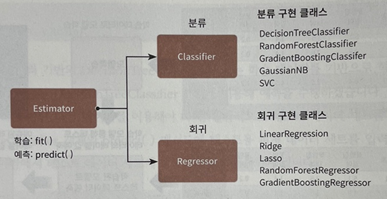

### 내장된 예제 데이터 셋

`data` : 피처의 데이터 셋 (ndarray)  
`target` : 분류 시 레이블 값, 회귀일 때는 숫자 결괏값 데이터 셋 (ndarray)  
`target_names` : 개별 레이블의 이름 (ndarray / list)  
`feature_names` : 피처의 이름 (ndarray / list)  
`DESCR` : 데이터 셋에 대한 설명과 각 피처의 설명 (string)

In [9]:
# 피처의 데이터 값을 반환받기 위해 내장 데이터 셋 API를 호출한 뒤, 그 Key 값을 지정
from sklearn.datasets import load_iris

iris = load_iris()
print(type(iris))

# Bunch 클래스는 딕셔너리 자료형과 유사

<class 'sklearn.utils.Bunch'>


In [10]:
keys = iris.keys()
keys

# Key = 피처들의 데이터 값

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [11]:
iris.target.shape

(150,)

***

## 3. Model Selection 모듈 소개

### 학습 / 테스트 데이터 셋 분리 -` train_test_split()`

In [12]:
# 학습과 예측을 동일한 데이터 셋으로 수행
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris() # iris 데이터 셋 불러오기
dt_clf = DecisionTreeClassifier() # 의사결정트리 객체 생성
train_data = iris.data 
train_label = iris.target
dt_clf.fit(train_data, train_label)

# 학습 데이터 셋 전체로 예측 진행
pred = dt_clf.predict(train_data)
print('예측 정확도 : ', accuracy_score(train_label, pred))

예측 정확도 :  1.0


예측 정확도가 100%인 이유는 학습 데이터를 기존 데이터의 100%를 사용했기 때문  
결국 동일한 데이터로 예측을 진행하여 정확도가 100%가 나온 것임  
  
실제로 예측을 진행할 때 학습 데이터와 테스트 데이터를 분리하여 진행해야 함을 알 수 있음  

### 학습/테스트 데이터를 분리하여 예측을 해보자  
`skleran.model_selection` 모듈에서 `train_test_split`을 로드  
    
**파라미터 종류**  
`test_size` : 전체 데이터에서 테스트 데이트 셋 크기 설정 (default = 0.25)  
`train_size` : 전체 데이터에서 학습 데이터 셋 크기 설정 (거의 사용 X)  
`shuffle` : 데이터르 분리하기 전에 데이터를 미리 섞을지를 결정, 데이터를 분산시켜 효율적인 학습 및 테스트 데이터 만드는 데 사용 (dafault = True)  
`random_state` : 호출할 때마다 동일한 학습/테스트용 데이터 셋 생성을 위해 주어지는 난수 값, train_test_split()는 무작위로 데이터를 분리하므로 random_state를 지정하지 않으면 수행할 때마다 다른 학습/테스트 데이터를 생성  

**train_test_split()의 반환값 = 튜플**  
((학습)피처 데이터 셋, (테스트)피처 데이터 셋, (학습)레이블 데이터 셋, (테스트)레이블 데이터 셋)

In [13]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [14]:
# iris 데이터 셋으로 예측 진행 (학습/테스트 데이터 분리)
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
dt_clf = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                   test_size = 0.3, random_state =121)

In [15]:
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test) # 학습을 시킨 객체에 X_test를 넣어서 예측값 출력
print('예측 정확도: {0: .4f}'.format(accuracy_score(y_test,pred))) # y_test와 예측값이 얼마나 유사한지 수치 출력

예측 정확도:  0.9556


iris 데이터는 150개의 데이터로 양이 크지 않아 전체의 30% 정도인 테스트 데이터는 45개이므로 알고리즘의 예측 성능을 판단하기에는 적절하지 않음

### 교차 검증

알고리즘을 학습시키는 학습 데이터와 이에 대한 예측 성능을 평가하기 위한 별도의 테스트용 데이터가 필요함을 앞서 파악함  
하지만 이는 **과적합(Overfitting)** 에 취약한 약점을 가짐  
  
  
`과적합(Overfitting)` : 모델이 학습 데이터에만 과도하게 최적화되어, 실제 예측을 다른 데이터로 수행할 경우에는 예측 성능이 과도하게 떨어지는 것  

고정된 학습 데이터와 테스트 데이터로 평가를 하다 보면 테스트 데이터에만 최적의 성능을 발휘할 수 있도록 편향되게 모델을 유도하는 경향이 생김  
이는 곧 해당 테스트 데이터에만 과적합되는 학습 모델이 마들어져 다른 테스트 데이터가 들어올 경우에는 성능이 저하됨  
=> 이를 해결하기 위해 **교차 검증**을 이용해 더 다양한 학습과 평가 진행  

* K 폴드

가장 보편적으로 사용되는 교차 검증 기법  
K개의 데이터 폴드 셋을 만들어서 K번만큼 각 폴드 셋에 학습과 검증 평가를 반복적으로 수행

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state = 156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 list 생성
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 데이터셋 크기:', features.shape[0])

붓꽃 데이터셋 크기: 150


`KFold(n_split=5)`로 KFold 객체를 생성했으니, KFold 객체의 split()을 호출해 전체 붓꽃 데이터를 5개의 폴드 데이터 세트로 분리  
iris 데이터셋의 크기 = 150 ->  학습용 데이터 세트는 이중 4/5개인 120개, 검증용 테스트 데이터 세트는 1/5인 30개로 분할됨.  

In [17]:
n_iter = 0

# KFold 객체의 split() 호출하면 폴드 별 학습용/검증용 테스트의 로우 인덱스를 array로 반환\
for train_index, test_index in kfold.split(features):
    # kfold.split() 으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출 (총 5번 진행)
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    #학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    
    # 반복 시 마다 정확도 측정
    accuracy = np.round(accuracy_score(y_test,pred),4)
    train_size = X_train.shape[0]
    test_size = y_test.shape[0]
    
    # print
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy))


#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 :0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 :0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


* Stratified k 폴드

`Startified K 폴드`는 불균형한 분포도를 가진 레이블 데이터 집합을 위한 K폴드 방식  
K 폴드가 레이블 데이터 집합이 원본 데이터 집합의 레이블 분포를 학습 및 테스트 세트에 제대로 분배하지 못하는 경우의 문제를 해결해줌

In [18]:
import pandas as pd

iris = load_iris()
iris_df = pd.DataFrame(data = iris.data, columns = iris.feature_names) # 데이터프레임 생성
iris_df['label'] = iris.target
iris_df.label.value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

각 레이블 값은 모두 50개로 동일  
이슈가 발생하는 현상을 도출하기 위해 3개의 폴드 세트를 KFold로 생성 후, 각 교차 검증 시마다 생성되는 학습/검증 레이블 데이터 값의 분포도 확인

In [19]:
kfold = KFold(n_splits = 3)
n_iter = 0

for train_index, test_index in kfold.split(iris_df):
    n_iter += 1
    label_train = iris_df.label.iloc[train_index]
    label_test = iris_df.label.iloc[test_index]
    print('## 교차 검증 {0}'.format(n_iter))
    print('학습 레이블 데이터 세트:\n',label_train.value_counts())
    print('검증 레이블 데이터 세트:\n',label_test.value_counts())
    print('\n')

## 교차 검증 1
학습 레이블 데이터 세트:
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 세트:
 0    50
Name: label, dtype: int64


## 교차 검증 2
학습 레이블 데이터 세트:
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 세트:
 1    50
Name: label, dtype: int64


## 교차 검증 3
학습 레이블 데이터 세트:
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 세트:
 2    50
Name: label, dtype: int64




첫번째 교차 검증의 경우 학습 레이블의 1,2 값이 각각 50개 추출되었고, 검증 레이블의 0값이 50개 추출되었다.  
이는 1,2 값에 대한 경우만 학습이 가능하므로 0에 대한 학습은 불가능  
-> 0에 대한 예측이 불가능하다  
  
이런 유형으로 교차 검증 데이터 세트를 분할하면 검증 예측 정확도는 0이 될 수 밖에 없다
***
`StratifiedKFold`는 이렇게 KFold로 분할된 레이블 데이터 세트가 전체 레이블 값의 분포도를 반영하지 못하는 문제를 해결해 준다

In [20]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits = 3)
n_iter = 0

for train_index, test_index in skf.split(iris_df, iris_df.label):
    n_iter += 1
    label_train = iris_df.label.iloc[train_index]
    label_test = iris_df.label.iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())
    print('\n')

## 교차 검증: 1
학습 레이블 데이터 분포:
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
1    17
2    16
Name: label, dtype: int64


## 교차 검증: 2
학습 레이블 데이터 분포:
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
2    17
1    16
Name: label, dtype: int64


## 교차 검증: 3
학습 레이블 데이터 분포:
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
2    17
0    16
Name: label, dtype: int64




0,1,2 각각 학습/테스트 레이블 데이터에 분포하고 있고 이제 0,1,2에 해당하는 학습을 할 수 있기 때문에 이에 기반해 검증을 수행할 수 있다.

In [21]:
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits = 3)
n_iter = 0
cv_accuracy = []

In [22]:
# StratifiedKFold의 split() 호출시 반드시 레이블 데이터 셋도 추가 입력 
for train_index, test_index in skfold.split(features, label):
    # split()으로 반환된 인덱스를 이용하여 학습/검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    
    # 학습 및 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    
    # 반복 시 마다 정확도 측정
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    
    # print
    print('\n#{0} 교차 검증 정확도: {1}, 학습 데이터 크기 : {2}, 검증 데이터 크기 : {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
print('## 평균 검증 정확도 : ',np.mean(cv_accuracy))


#1 교차 검증 정확도: 0.98, 학습 데이터 크기 : 100, 검증 데이터 크기 : 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도: 0.94, 학습 데이터 크기 : 100, 검증 데이터 크기 : 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도: 0.98, 학습 데이터 크기 : 100, 검증 데이터 크기 : 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]
## 평균 검증 정확도 :  0.9666666666666667


`StratifiedKFold`의 경우 원본 데이터의 레이블 분포도 특성을 반영한 학습 및 검증 데이터 세트를 만들 수 있으므로 **왜곡된 레이블 데이터 세트**에서는 반드시 `StratifiedKFold`를 이용해 교차 검증을 해야함

**회귀(Regression)에서는 StratifiedKFold가 지원X**  
-> 회귀의 결정값은 이산값 형태의 레이블이 아닌, 연속된 숫자값이기 때문에 결정값별로 분포를 정하는 의미가 없기 때문

* cross_val_score()

`cross_val_score()`은 KFold검증의 일련의 과정을 한꺼번에 수행하는 API  
  
**주요 파라미터 종류**  
`cross_val_score(estimator, X, y, scoring(성능 지표), cv(교차 검증 세트))`


In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris = load_iris()
df_clf = DecisionTreeClassifier(random_state = 156)

data = iris.data
label = iris.target

# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv = 3)
print('교차 검증별 정확도: ',np.round(scores,4))
print('평균 검증 정확도: ',np.round(np.mean(scores),4))

교차 검증별 정확도:  [0.98 0.94 0.98]
평균 검증 정확도:  0.9667


cv로 지정된 횟수만큼 scoring 파라미터로 지정된 평가 지표로 평가 결괏값을 배열로 반환  
그리고 일반적으로 이를 평균해 평가 수치로 사용  
  
내부에서 Estimator를 학습(fit), 예측(predict), 평가(evaluation)시켜주므로 간단하게 교차 검증 수행 가능

`cross_val_score()`는 내부적으로 `StratifiedKFold`를 이용함

* GridSearchCV

`GridSearchCV`는 교차 검증을 기반으로 하이퍼 파라미터의 최적 값을 찾게 해준다.  
즉, 데이터셋을 cross-validation을 위한 학습/데이터 세트로 자동으로 분할한 뒤에 하이퍼 파라미터 그리드에 기술된 모든 파라미터를 순차적으로 적용해 최적의 파라미터를 찾게 해줌  
  
`GridSearchCV`는 사용자가 튜닝하고자 하는 여러 종류의 하이퍼 파라미터를 다양하게 테스트하면서 최적의 파라미터를 편리하게 찾게 해주지만, 동시에 순차적으로 파라미터를 테스트하므로 수행시간이 김  
  
**파라미터 종류**  
`estimator` : classifier, regressor, pipeline이 사용됨  
`param_grid`: key + 리스트 값을 가지는 딕셔너리, estimator의 튜닝을 위해 파라미터명과 사용될 여러 파라미터 값 지정  
`scoring` : 예측 성능을 측정할 평가 방법 지정, 보통은 사이킷런의 성능 평가 지표를 지정하는 문자열로 지정하나 별도의 성능 평가 지표 함수도 지정 가능  
`cv` : 교차 검증을 위해 분할되는 학습/테스트 세트의 개수 지정  
`refit` : 디폴트가 True이며 True로 생성 시 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객체를 해당 하이퍼 파라미터로 재학습시킴

In [24]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

iris =  load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.2, random_state = 121)
dtree = DecisionTreeClassifier()

# DecisionTreeClassifier의 하이퍼 파라미터 max_depth 와 min_samples_split의 값 변화시키면서 최적화
# 파라미터를 딕셔너리 형태로 설정
parameters = {'max_depth' : [1,2,3], 'min_samples_split': [2,3]}

In [25]:
import pandas as pd

# param_grid의 하이퍼 파라미터를 3개의 train, test set fold로 나누어 테스트 수행 설정
# refit = True (deflaut), True면 가장 좋은 파라미터 설정으로 재학습시킴
grid_dtree = GridSearchCV(dtree, param_grid = parameters, cv = 3, refit = True)

# iris 학습 데이터로 param_grid의 하이퍼 파라미터를 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과를 추출해 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score',
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


`rank_test_score` : 해당 파라미터의 조합으로 평가한 결과 예측 성능의 순위  
`split_test_score` : 지정된 CV의 개수에 따라 폴딩 세트에서 각각 테스트한 성능 수치  
`mean_test_score` : split_test_score의 총 성능을 종합하여 평균한 수치

In [26]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9750


In [27]:
# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 됨
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

테스트 데이터 세트 정확도: 0.9667


일반적으로 학습 데이터를 GridSearchCV를 이용해 최적 하이퍼 파라미터 튜닝을 수행한 뒤에 별도의 테스트 세트에서 이를 평가하는 것이 일반적인 머신러닝 모델 적용 방법

***

## 4. 데이터 전처리

### 데이터 인코딩

* 레이블 인코딩(Label encoding)  
  
**레이블 인코딩** : 카테고리 피처를 코드형 숫자 값으로 변화하는 것('01'= 문자형이므로 X)

In [28]:
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

# LabelEncoder를 객체로 생성한 후, fit()과 transform()으로 label 인코딩 수행
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값 :', labels)  # 인코딩 된 값
print('인코딩 클래스:',encoder.classes_)  # 인코딩된 값의 클래스 확인
print('디코딩 원본 값:',encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))  # 인코딩된 값 디코딩

인코딩 변환값 : [0 1 4 5 3 3 2 2]
인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']
디코딩 원본 값: ['전자렌지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


레이블 인코딩이 일괄적인 숫자 값으로 변환이 되면서 몇몇 ML 알고리즘에는 이를 적용할 경우 예측 성능이 떨어지는 경우가 발생할 수 있음  
-> 숫자 값의 겨우 크고 작음에 대한 특성이 작용하기 때문  
  
ex) 1보다 2가 더 큰 값이기 때문에 가중치가 적용되어 예측 수행 간 오차 발생  
  
이러한 특성 때문에 레이블 인코딩은 선형회귀와 같은 ML 알고리즘에는 적용하지 않아야 함  
  
트리 계열의 ML 알고리즘은 숫자의 이러한 특성을 반영하지 않으므로 레이블 인코딩도 문제가 없다

* 원-핫 인코딩(One-Hot Encoding)  
  
**원-핫 인코딩** : 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시, 나머지 칼럼에는 0을 표시  
  
1. OneHotEncoder로 변환하기 전에 모든 문자열 값이 숫자형 값으로 변환돼야 함  
2. 입력 값으로 2차원 데이터가 필요

In [29]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

# 모든 문자열 값을 숫자형 값으로 변환 -> LabelEncoder 사용
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)

# Ont-Hot Encoder을 위해 2차원 데이터로 변환
labels = labels.reshape(-1,1)

# One-Hot Encoding 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)

print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


In [30]:
# 데이터프레임으로 변경
import pandas as pd

df = pd.DataFrame({'item':['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서'] })
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자렌지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


`get_dummies()`를 이용하면 숫자형 값으로 변환 없이도 바로 변환이 가능

### 피처 스케일링과 정규화

**피처 스케일링**: 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업  
`표준화`와 `정규화`로 나뉨  
  
`표준화` : 데이터의 피처 각각의 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환하는 것  
`정규화` : 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념  
`Normalizer 모듈` : 선형대수에서의 정규화 개념 적용, 개별 벡터 크기를 맞추기 위해 변환  
(= 벡터 정규화)

* StandardScaler  
  
**StandardScaler** : 표준화를 쉽게 지원하기 위한 클래스

In [31]:
from sklearn.datasets import load_iris
import pandas as pd
# 붓꽃 데이터 셋을 로딩하고 DataFrame으로 변환합니다. 
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [32]:
# 표준화 진행
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# StandardScaler로 데이터 셋 변환, fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 scale 변환된 데이터 셋이 numpy ndarray로 변환되어 이를 DataFraome으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


* MinMaxScaler  
  
**MinMaxScaler** : 데이터값을 0과 1 사이의 범위 값으로 변환, (음수 값이 있으면 -1 ~ 1로 변환)

In [33]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# MinMaxScaler로 데이터 셋 변환, fit()과 transform() 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최소 값')
print(iris_df_scaled.min())
print('\nfeature들의 최대 값')
print(iris_df_scaled.max())

feature들의 최소 값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최대 값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


### 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점

Scaler 객체를 이용해 스케일링 변환 시 fit(), transform(), fit_transform() 메소드 사용  
일반적으로 `fit()`은 데이터 변환을 위한 기준 정보 설정을 적용하며 `transform()`은 이렇게 설정된 정보를 이용해 데이터를 변환. `fit_transform()`은 fit()와 transform()을 한번에 적용하는 기능 수행

#### 학습 데이터와 테스트 데이터 셋에 fit()과 transform()을 적용할 때 주의할 점  
  
Scaler 객체를 이용해 학습 데이터 세트로 fit()과 transform()을 적용하면 테스트 데이터 셋으로는 다시 fit()을 수행하지 않고 학습 데이터 셋으로 fit()을 수행한 결과를 이용해 transform() 변환을 적용해야 함.  
  
즉, 학습 데이터로 fit()이 적용된 스케일링 기준 정보를 그대로 테스트 데이터에 적용해야 하며 그렇지 않고 테스트 데이터로 다시 새로운 스케일링 기준 정보를 만들게 되면 학습 데이터와 테스트 데이터의 스케일링 기준 정보가 서로 달라지기 때문에 올바른 예측 결과 도출 불가

In [34]:
# 예시 코드

from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0 부터 10까지, 테스트 데이터는 0 부터 5까지 값을 가지는 데이터 세트로 생성
# Scaler클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1, 1)로 차원 변경
train_array = np.arange(0, 11).reshape(-1, 1)
test_array =  np.arange(0, 6).reshape(-1, 1)

In [35]:
# 최소값 0, 최대값 1로 변환하는 MinMaxScaler객체 생성
scaler = MinMaxScaler()

# fit()하게 되면 train_array 데이터의 최소값이 0, 최대값이 10으로 설정.  
scaler.fit(train_array)

# 1/10 scale로 train_array 데이터 변환함. 원본 10-> 1로 변환됨.
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [36]:
# 테스트 데이터에 fit() 적용
scaler.fit(test_array)

# 1/5 scale로 test_array 데이터 변환함. 원본 5->1로 변환.  
test_scaled = scaler.transform(test_array)

# train_array 변환 출력
print('원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


scale된 학습 데이와 테스트 데이터의 원본 데이터 대비 scale된 데이터가 맞지 않아 정확한 예측을 진행할 수 없음  
**-> 학습 데이터와 테스트 데이터의 서로 다른 원본 값이 동일한 값으로 변환되는 결과 초래**

In [37]:
# 테스트 데이터에 fit()을 적용하지 않은 예시

scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

# test_array에 Scale 변환을 할 때는 transform()으로 변환, fit() X
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


## 5. 사이킷런으로 수행하는 타이타닉 생존자 예측

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic = pd.read_csv('./titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [83]:
titanic.info() # 결측값 존재 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [84]:
## 예시이므로 편의를 위해 다음과 같이 결측값 설정

# Age의 결측값을 편하게 Age의 평균으로 변경
titanic.Age.fillna(titanic.Age.mean(), inplace = True)

# Cabin의 결측값을 N으로 설정
titanic.Cabin.fillna('N', inplace = True)

# Embarked의 결측값을 N으로 설정
titanic.Embarked.fillna('N', inplace = True)

titanic.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [85]:
titanic.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [86]:
titanic.Embarked.value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [87]:
titanic.Cabin.value_counts()

N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E36              1
D9               1
B4               1
D56              1
D50              1
Name: Cabin, Length: 148, dtype: int64

In [88]:
# Cabin 속성 재설정 (편의를 위해)
titanic['Cabin'] = titanic.Cabin.str[:1]

In [89]:
# 성별별 생존 인원 파악 (0 = 사망, 1 = 생존)
titanic.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

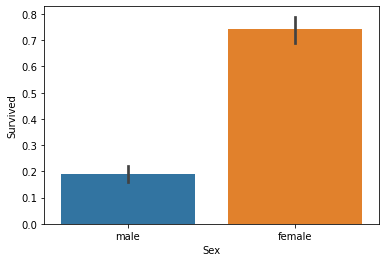

In [90]:
sns.barplot(x = 'Sex', y = 'Survived', data = titanic)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

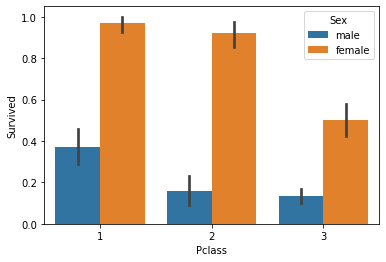

In [91]:
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = titanic)

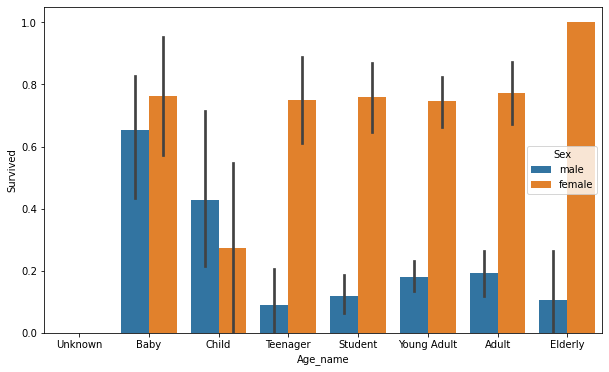

In [95]:
# 나이별 생존여부 파악

def age_category(age):
    a = ''
    if age <= -1: a = 'Unknown'
    elif age <=5: a = 'Baby'
    elif age <= 12: a = 'Child'
    elif age <= 18: a = 'Teenager'
    elif age <= 25: a = 'Student'
    elif age <= 35: a = 'Young Adult'
    elif age <= 60: a = 'Adult'
    else : a = 'Elderly'
    
    return a

# Age_name열 생성
titanic['Age_name'] = titanic.Age.apply(lambda x : age_category(x))\

# 시각화
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']
plt.figure(figsize = (10,6))
sns.barplot(x = 'Age_name', y = 'Survived', hue = 'Sex', data = titanic, order = group_names)
plt.show()

In [100]:
# 남아있는 문자열 카테고리 피처를 숫자형으로 변경
from sklearn import preprocessing

def encode_features(df):
    features = ['Cabin', 'Sex', 'Embarked']
    for features in features:
        a = preprocessing.LabelEncoder()
        a = a.fit(df[features])
        df[features] = a.transform(df[features])
    return df

titanic = encode_features(titanic)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_name
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3,Student
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3,Young Adult
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3,Young Adult


In [113]:
## 지금까지 한 전처리 함수화

from sklearn.preprocessing import LabelEncoder

# Null값 처리 함수
def fillna(df):
    df.Age.fillna(df.Age.mean(), inplace = True)
    df.Cabin.fillna('N', inplace = True)
    df.Embarked.fillna('N', inplace = True)
    df.Fare.fillna(0, inplace = True)
    return df

# 머신러닝 알고리증에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# LabelEncoding
def format_features(df):
    df['Cabin'] = df.Cabin.str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        a = LabelEncoder()
        a = a.fit(df[feature])
        df[feature] = a.transform(df[feature])
    return df

# 앞서 설정한 Data Preprocessing 함수 설정
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [114]:
# 원본 데이터 재로딩 / feature 데이터 셋과 Label 데이터 셋 설정
titanic = pd.read_csv('./titanic_train.csv')

X_titanic = titanic.drop('Survived', axis = 1)
y_titanic = titanic.Survived

X_titanic = transform_features(X_titanic)

In [118]:
# 학습 / 테스트 데이터 셋 설정
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic, y_titanic,
                                                   test_size = 0.2, random_state = 11)

In [130]:
# 결정 트리, 랜덤 포레스트, 로지스틱 회귀를 이용하여 titanic 생존자 예측
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state = 11)
rf_clf = RandomForestClassifier(random_state = 11)
lr_clf = LogisticRegression()

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도:{0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도:0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도:0.8492


C:\Users\jinho\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [141]:
# KFold 교차 검증
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트 5개로 설정
    kfold = KFold(n_splits = folds)
    scores = []
    
    # KFold 교차검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic)):
        # X_train 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic.values[train_index], X_titanic.values[test_index]
        y_train, y_test = y_titanic.values[train_index], y_titanic.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도 : {1:.4f}".format(iter_count, accuracy))
        
    # 5개 fold에서의 평균 정확도 계산
    mean_score = np.mean(scores)
    print("평균 정확도 : {0:.4f}".format(mean_score))
    

exec_kfold(dt_clf, folds = 5)

교차 검증 0 정확도 : 0.7542
교차 검증 1 정확도 : 0.7809
교차 검증 2 정확도 : 0.7865
교차 검증 3 정확도 : 0.7697
교차 검증 4 정확도 : 0.8202
평균 정확도 : 0.7823


In [143]:
# cross_val_score()
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic, y_titanic, cv = 5)
for iter_count, accuracy in enumerate(scores):
    print('교차 검증 {0} 정확도 : {1:.4f}'.format(iter_count, accuracy))
    
print('평균 정확도 : {0:.4f}'.format(np.mean(scores)))

교차 검증 0 정확도 : 0.7430
교차 검증 1 정확도 : 0.7753
교차 검증 2 정확도 : 0.7921
교차 검증 3 정확도 : 0.7865
교차 검증 4 정확도 : 0.8427
평균 정확도 : 0.7879


`KFold`와 `cross_val_score`의 정확도가 다른 이유는 `cross_val_score`이 `StratifiedKfold`를 이용해 폴드 세트를 분할하기 때문

In [144]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715


하이퍼 파라미터 변경 전보다 예측 정확도가 약 8% 증가  
하지만 일반적으로 하이퍼 파라미터를 변경해서 이정도의 증가량을 보이기는 쉽지 않음  
테스트용 데이터 세트가 작아서 가능한 사례